<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Operasi_Image_Noise_dan_Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise dan Filtering

In [ ]:
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02b_filtering_and_resampling/Tour_Eiffel.jpg".split()
    )


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

figsize = (10, 10)

## Mendapatkan Image Dasar

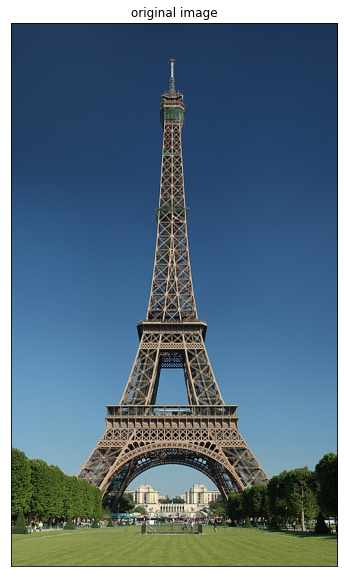

In [ ]:
def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()


img = cv2.imread("Tour_Eiffel.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_im(img, "original image")

## Mean Filter

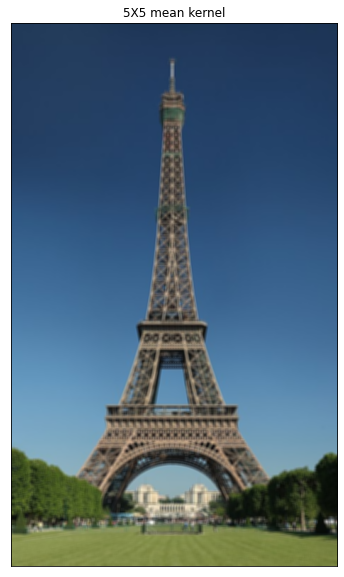

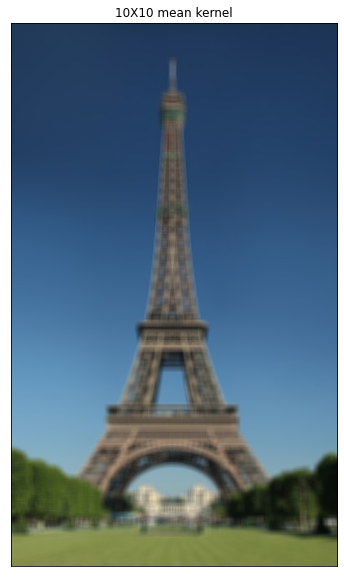

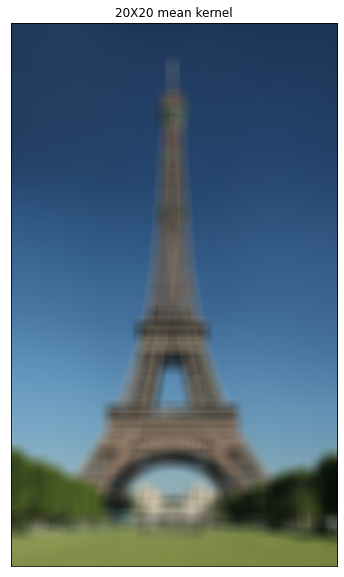

In [ ]:
def mean_kernel_smoothing(img, sz):
    kernel = np.ones((sz, sz)) / (sz ** 2)
    dst = cv2.filter2D(img, -1, kernel)

    plot_im(dst, str(sz) + "X" + str(sz) + " mean kernel")


mean_kernel_smoothing(img, 5)
mean_kernel_smoothing(img, 10)
mean_kernel_smoothing(img, 20)

## Gaussian Filter

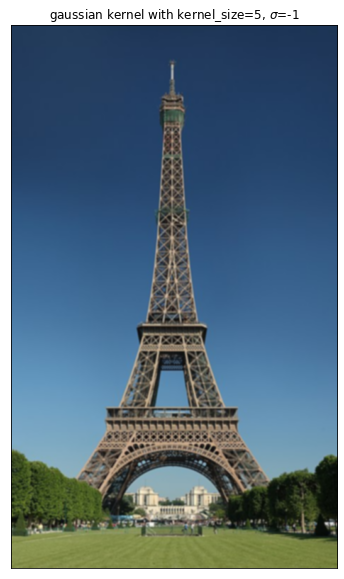

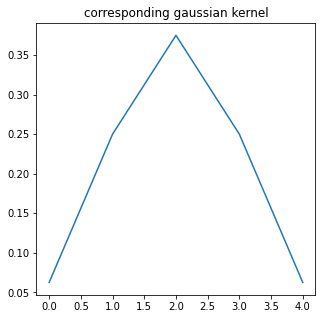

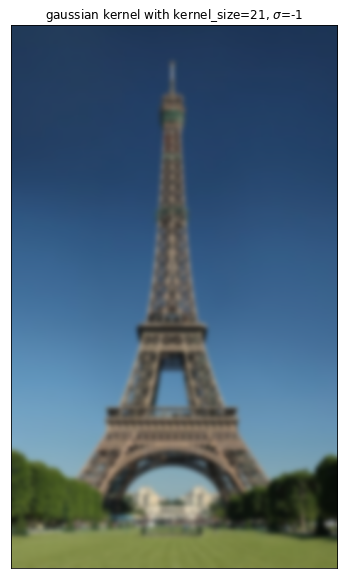

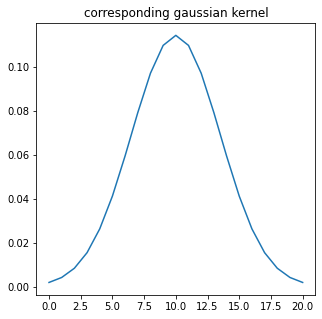

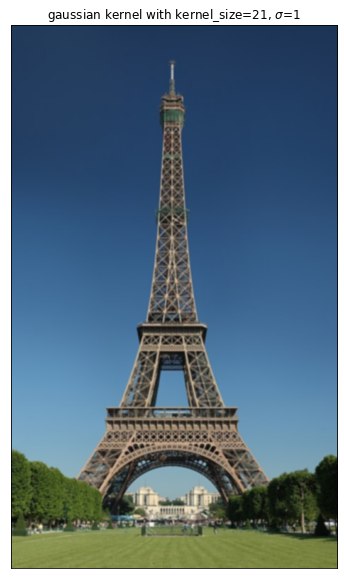

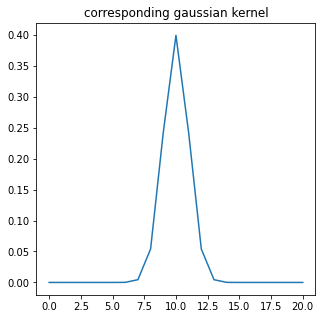

In [ ]:
def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)
    plot_im(blur, "gaussian kernel with kernel_size=" + str(k_sz) + r", $\sigma$=" + str(sigma))
    if is_plot_kernel:
        # sigma=-1 will set the sigma size automatically
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(figsize[0] / 2, figsize[1] / 2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")
        plt.show()


gauss_blur(img, 5, is_plot_kernel=True)
gauss_blur(img, 21, is_plot_kernel=True)
gauss_blur(img, 21, 1, is_plot_kernel=True)

## Median Filter

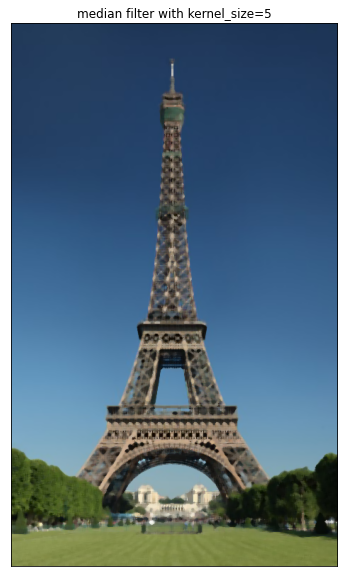

In [ ]:
def median_filter(img, k_sz):
    res = cv2.medianBlur(img, k_sz)
    plot_im(res, "median filter with kernel_size=" + str(k_sz))


median_filter(img, 5)

## Fungsi Tambahan Noise 

In [ ]:
def gauss_noise(image, gauss_var=1000):
    mean = 0
    sigma = gauss_var ** 0.5
    gauss = np.random.normal(mean, sigma, image.shape)

    res = image + gauss
    noisy = np.clip(res, 0, 255).astype(np.uint8)
    return noisy


def s_and_p_noise(image, s_p_ratio=0.04):
    # this implementation is not entirely correct because it assumes that
    # only 0 OR 255 values are S&P noise.
    out = np.copy(image)

    # Salt mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 255

    # Pepper mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 0
    return out


## Ujicoba Gaussian Noise

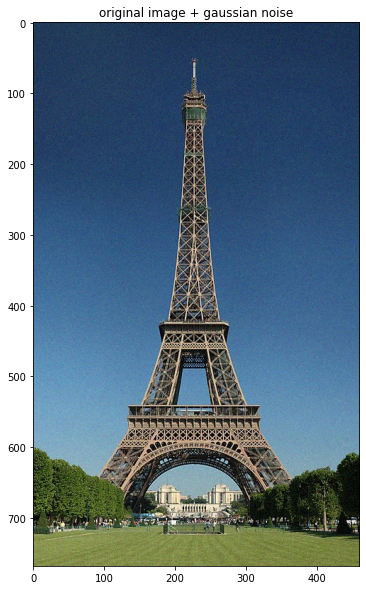

In [ ]:
np.random.seed(1234)

gauss_noise_im = gauss_noise(img, gauss_var=70)
plt.figure(figsize=figsize)
plt.imshow(gauss_noise_im)
plt.title("original image + gaussian noise")
plt.show()

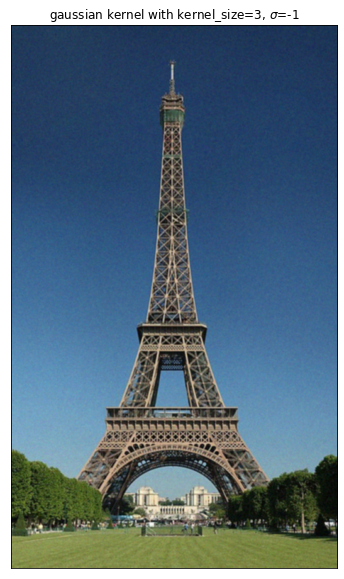

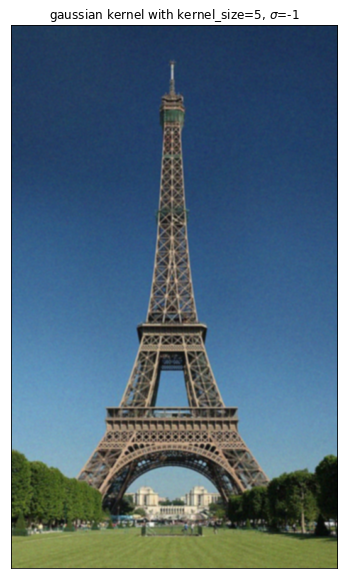

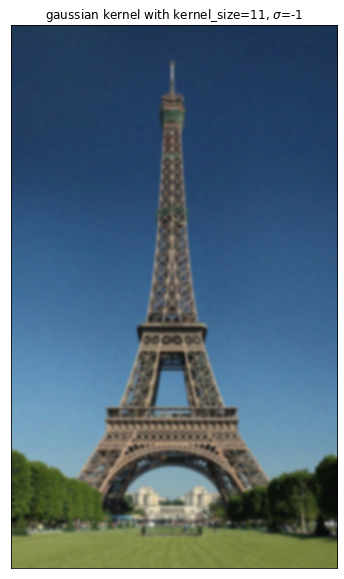

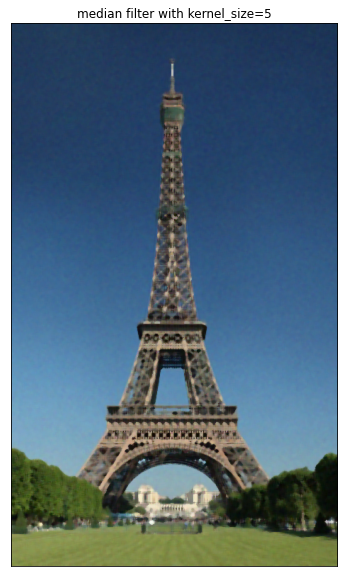

In [ ]:
gauss_blur(gauss_noise_im, 3)
gauss_blur(gauss_noise_im, 5)
gauss_blur(gauss_noise_im, 11)
median_filter(gauss_noise_im, 5)


## Ujicoba Salt dan Pepper Noise

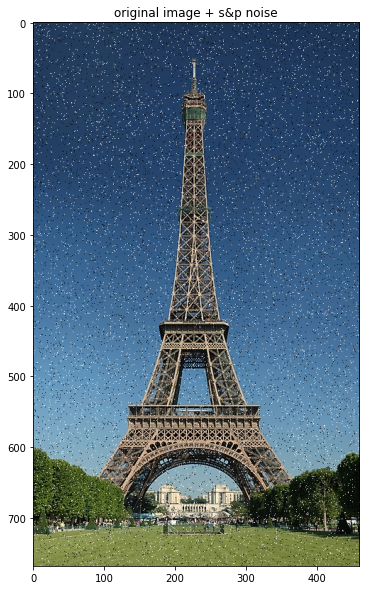

In [ ]:
s_p_noise_im = s_and_p_noise(img, s_p_ratio=0.04)
plt.figure(figsize=figsize)
plt.imshow(s_p_noise_im)
plt.title("original image + s&p noise")
plt.show()
